## Unlearning performance

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Plot options
plt.rcParams['lines.linewidth'] = 2.5
plt.rcParams['font.size'] = 15
plt.rcParams['font.weight'] = 'bold'
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['figure.constrained_layout.use'] = True
plt.rcParams['legend.loc'] = 'lower right'
plt.rcParams['legend.fontsize'] = 11

In [13]:
model_type = "nn_mixer" # change this


method_list = ["ori", "retrain", "unlearn"]
creteria_list = ["mse", "mape", "cost"]
unlearn_prop_list = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]

mse_remain_ori = []
mse_remain_unlearn = []
mse_unlearn_ori = []
mse_unlearn_unlearn = []
mse_test_ori = []
mse_test_unlearn = []

mape_remain_ori = []
mape_remain_unlearn = []
mape_unlearn_ori = []
mape_unlearn_unlearn = []
mape_test_ori = []
mape_test_unlearn = []

cost_remain_ori = []
cost_remain_unlearn = []
cost_unlearn_ori = []
cost_unlearn_unlearn = []
cost_test_ori = []
cost_test_unlearn = []

for unlearn_prop in unlearn_prop_list:
    print('unlearn_prop: ', unlearn_prop)
    model_dir = f"simulation_result/{model_type}/unlearning_{unlearn_prop}.npy"
    metric = np.load(model_dir, allow_pickle=True).item()
    for creteria in creteria_list:
        for method in method_list:
            print(f"{creteria}_{method}:")
            data = metric[creteria + "_" + method]
            print(data)
            
            if creteria == "mse" and method == "ori":
                mse_remain_ori.append(data["remain"])
                mse_unlearn_ori.append(data["unlearn"])
                mse_test_ori.append(data["test"])
            if creteria == "mse" and method == "unlearn":
                mse_remain_unlearn.append(data["remain"])
                mse_unlearn_unlearn.append(data["unlearn"])
                mse_test_unlearn.append(data["test"])
            
            if creteria == "cost" and method == "ori":
                cost_remain_ori.append(data["remain"])
                cost_unlearn_ori.append(data["unlearn"])
                cost_test_ori.append(data["test"])
            if creteria == "cost" and method == "unlearn":
                cost_remain_unlearn.append(data["remain"])
                cost_unlearn_unlearn.append(data["unlearn"])
                cost_test_unlearn.append(data["test"])
                
            if creteria == "mape" and method == "ori":
                mape_remain_ori.append(data["remain"])
                mape_unlearn_ori.append(data["unlearn"])
                mape_test_ori.append(data["test"])
            if creteria == "mape" and method == "unlearn":
                mape_remain_unlearn.append(data["remain"])
                mape_unlearn_unlearn.append(data["unlearn"])
                mape_test_unlearn.append(data["test"])
            
    print("\n")

mse_remain_ori = np.array(mse_remain_ori)
mse_remain_unlearn = np.array(mse_remain_unlearn)
mse_unlearn_ori = np.array(mse_unlearn_ori)
mse_unlearn_unlearn = np.array(mse_unlearn_unlearn)
mse_test_ori = np.array(mse_test_ori)
mse_test_unlearn = np.array(mse_test_unlearn)

cost_remain_ori = np.array(cost_remain_ori)
cost_remain_unlearn = np.array(cost_remain_unlearn)
cost_unlearn_ori = np.array(cost_unlearn_ori)
cost_unlearn_unlearn = np.array(cost_unlearn_unlearn)
cost_test_ori = np.array(cost_test_ori)
cost_test_unlearn = np.array(cost_test_unlearn)

mape_remain_ori = np.array(mape_remain_ori)
mape_remain_unlearn = np.array(mape_remain_unlearn)
mape_unlearn_ori = np.array(mape_unlearn_ori)
mape_unlearn_unlearn = np.array(mape_unlearn_unlearn)
mape_test_ori = np.array(mape_test_ori)
mape_test_unlearn = np.array(mape_test_unlearn)

unlearn_prop:  0.05
mse_ori:
{'remain': 0.0003677156, 'unlearn': 0.00046768648, 'test': 0.0053231753}
mse_retrain:
{'remain': 0.00036691918, 'unlearn': 0.000499498, 'test': 0.00546798}
mse_unlearn:
{'remain': 0.00036691918, 'unlearn': 0.000499498, 'test': 0.0054679797}
mape_ori:
{'remain': 3.316880762577057, 'unlearn': 3.8087647408246994, 'test': 9.897851943969727}
mape_retrain:
{'remain': 3.3114243298768997, 'unlearn': 3.9383482187986374, 'test': 9.986010193824768}
mape_unlearn:
{'remain': 3.3114247024059296, 'unlearn': 3.9383482187986374, 'test': 9.986009448766708}
cost_ori:
{'remain': 441.98833225349625, 'unlearn': 462.59875596759446, 'test': 540.8265220073865}
cost_retrain:
{'remain': 439.5703096792779, 'unlearn': 476.75884505095297, 'test': 550.3761931584544}
cost_unlearn:
{'remain': 439.5703377627647, 'unlearn': 476.7588022897033, 'test': 550.376213216068}


unlearn_prop:  0.1
mse_ori:
{'remain': 0.00036088668, 'unlearn': 0.00047924527, 'test': 0.0053231753}
mse_retrain:
{'remain

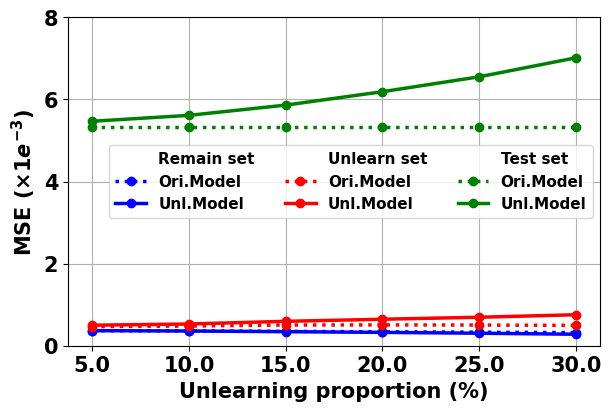

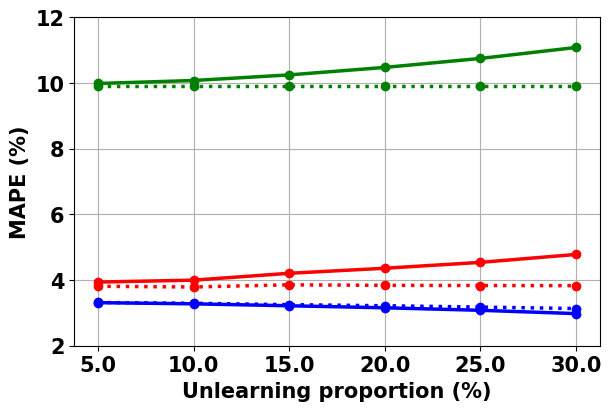

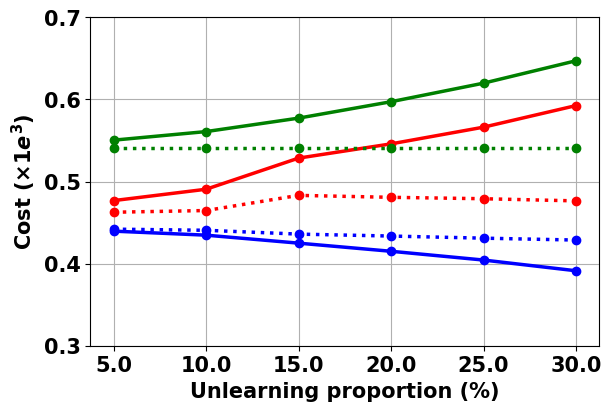

In [14]:
plt.figure()
p11 = plt.plot(mse_remain_ori * 1e3, color = "blue", linestyle=':', marker = "o")
p12 = plt.plot(mse_remain_unlearn* 1e3, color = "blue", linestyle = "-", marker = "o")
p13 = plt.plot([0], marker='None', linestyle='None')
p21 = plt.plot(mse_unlearn_ori* 1e3, color = "red", linestyle = ":", marker = "o")
p22 = plt.plot(mse_unlearn_unlearn* 1e3, color = "red", linestyle = "-", marker = "o")
p23 = plt.plot([0], marker='None', linestyle='None')
p31 = plt.plot(mse_test_ori* 1e3, color = "green", linestyle = ":", marker = "o")
p32 = plt.plot(mse_test_unlearn* 1e3, color = "green", linestyle = "-", marker = "o")
p33 = plt.plot([0], marker='None', linestyle='None')
plt.xticks(np.arange(len(unlearn_prop_list)), np.array(unlearn_prop_list) * 100)
plt.grid()
plt.xlabel("Unlearning proportion (%)")
plt.ylabel(r"MSE ($\times 1e^{-3}$)")
if model_type == "linear":
    plt.ylim([0, 11])
elif model_type == "nn_conv":
    plt.ylim([0, 9])
elif model_type == "nn_mixer":
    plt.ylim([0, 8])
leg1 = plt.legend([p13[0], p11[0], p12[0], p13[0], p21[0], p22[0], p13[0], p31[0], p32[0]], ["Remain set", "Ori.Model", "Unl.Model", "Unlearn set", "Ori.Model", "Unl.Model", "Test set", "Ori.Model", "Unl.Model"],
                ncol = 3, loc = "best")
plt.savefig(f"figs/{model_type}_unlearn_mse.pdf", bbox_inches='tight')
plt.show()

plt.figure()
p11 = plt.plot(mape_remain_ori, color = "blue", linestyle = ":", marker = "o")
p12 = plt.plot(mape_remain_unlearn, color = "blue", linestyle = "-", marker = "o")
p13 = plt.plot([0], marker='None', linestyle='None')
p21 = plt.plot(mape_unlearn_ori, color = "red", linestyle = ":", marker = "o")
p22 = plt.plot(mape_unlearn_unlearn, color = "red", linestyle = "-", marker = "o")
p23 = plt.plot([0], marker='None', linestyle='None')
p31 = plt.plot(mape_test_ori, color = "green", linestyle = ":", marker = "o")
p32 = plt.plot(mape_test_unlearn, color = "green", linestyle = "-", marker = "o")
p33 = plt.plot([0], marker='None', linestyle='None')
plt.xticks(np.arange(len(unlearn_prop_list)), np.array(unlearn_prop_list) * 100)
plt.grid()
plt.xlabel("Unlearning proportion (%)")
plt.ylabel(r"MAPE (%)")
if model_type == "linear":
    plt.ylim([5, 20])
elif model_type == "nn_conv":
    plt.ylim([2, 12.1])
elif model_type == "nn_mixer":
    plt.ylim([2, 12])

# leg1 = plt.legend([p13[0], p11[0], p12[0], p13[0], p21[0], p22[0], p13[0], p31[0], p32[0]], ["Remain", "Original", "Unlearned", "Unlearn", "Original", "Unlearned", "Test", "Original", "Unlearned"],
#                 ncol = 3, loc = "best")
plt.savefig(f"figs/{model_type}_unlearn_mape.pdf", bbox_inches='tight')

plt.figure()
p11 = plt.plot(cost_remain_ori / 1e3, color = "blue", linestyle = ":", marker = "o")
p12 = plt.plot(cost_remain_unlearn/ 1e3, color = "blue", linestyle = "-", marker = "o")
p13 = plt.plot([0], marker='None', linestyle='None')
p21 = plt.plot(cost_unlearn_ori/ 1e3, color = "red", linestyle = ":", marker = "o")
p22 = plt.plot(cost_unlearn_unlearn/ 1e3, color = "red", linestyle = "-", marker = "o")
p23 = plt.plot([0], marker='None', linestyle='None')
p31 = plt.plot(cost_test_ori/ 1e3, color = "green", linestyle = ":", marker = "o")
p32 = plt.plot(cost_test_unlearn/ 1e3, color = "green", linestyle = "-", marker = "o")
p33 = plt.plot([0], marker='None', linestyle='None')
plt.xticks(np.arange(len(unlearn_prop_list)), np.array(unlearn_prop_list) * 100)
plt.grid()
plt.xlabel("Unlearning proportion (%)")
plt.ylabel(r"Cost ($\times 1e^{3}$)")
if model_type == "linear":
    plt.ylim([0.6, 1.4])
elif model_type == "nn_conv":
    plt.ylim([0.4, 0.61])
elif model_type == "nn_mixer":
    plt.ylim([0.3, 0.7])
# leg1 = plt.legend([p13[0], p11[0], p12[0], p13[0], p21[0], p22[0], p13[0], p31[0], p32[0]], ["Remain", "Original", "Unlearned", "Unlearn", "Original", "Unlearned", "Test", "Original", "Unlearned"],
#                 ncol = 3, loc = "best")
plt.savefig(f"figs/{model_type}_unlearn_cost.pdf", bbox_inches='tight')
plt.show()

## Sensitivity analysis

over number:  1718 under number:  1962


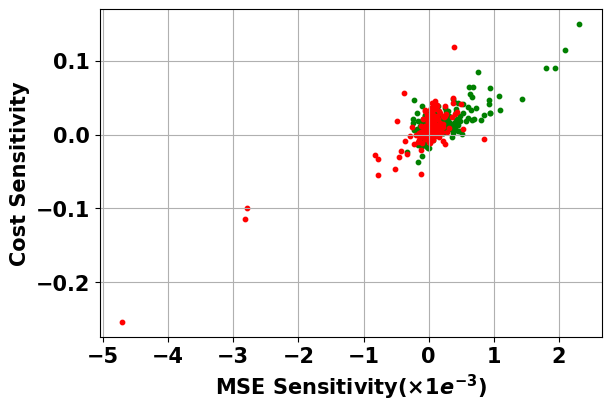

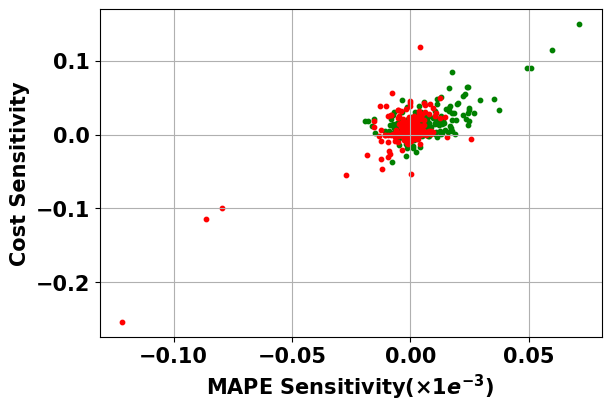

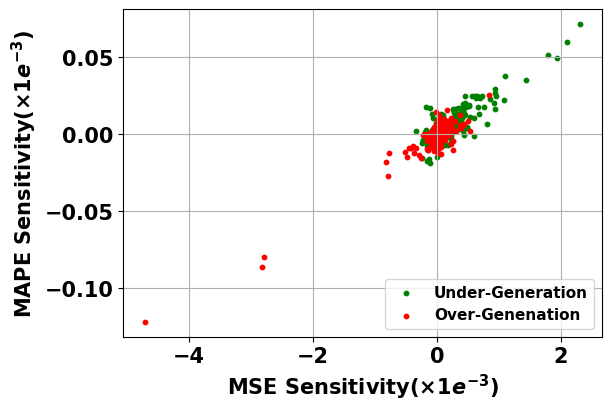

r_mse_mape:  PearsonRResult(statistic=0.8564097480355015, pvalue=0.0)
r_mse_cost:  PearsonRResult(statistic=0.7746244193333803, pvalue=0.0)
r_mape_cost:  PearsonRResult(statistic=0.6573070497945512, pvalue=0.0)


In [4]:
mse_scores = np.load(f"simulation_result/{model_type}/unchange_0.25_mse_scores.npy", allow_pickle=True).item()
mape_scores = np.load(f"simulation_result/{model_type}/unchange_0.25_mape_scores.npy", allow_pickle=True).item()
cost_scores = np.load(f"simulation_result/{model_type}/unchange_0.25_cost_scores.npy", allow_pickle=True).item()

mismatch = mse_scores['mismatch_remain']
over_index = np.where(mismatch > 0)[0]
under_index = np.where(mismatch <= 0)[0]
print('over number: ', len(over_index), 'under number: ', len(under_index))

np.random.seed(10)

number_point = 500
over_index = np.random.choice(over_index, number_point, replace = False)
under_index = np.random.choice(under_index, number_point, replace = False)

plt.figure()
plt.scatter(mse_scores['remain'][under_index] * 1e3, cost_scores['remain'][under_index], s = 10, color = 'green', label = 'Under-Generation')
plt.scatter(mse_scores['remain'][over_index] * 1e3, cost_scores['remain'][over_index], s = 10, color = 'red', label = 'Over-Genenation')
plt.xlabel(r"MSE Sensitivity($\times 1e^{-3}$)")
plt.ylabel(r"Cost Sensitivity")
# plt.legend()
plt.grid()
plt.savefig(f"figs/{model_type}_sensitivity_mse-cost.pdf", bbox_inches='tight')
plt.show()

plt.figure()
plt.scatter(mape_scores['remain'][under_index] * 1e3, cost_scores['remain'][under_index], s = 10, color = 'green', label = 'Under-Generation')
plt.scatter(mape_scores['remain'][over_index] * 1e3, cost_scores['remain'][over_index], s = 10, color = 'red', label = 'Over-Genenation')
plt.xlabel(r"MAPE Sensitivity($\times 1e^{-3}$)")
plt.ylabel(r"Cost Sensitivity")
# plt.legend()
plt.grid()
plt.savefig(f"figs/{model_type}_sensitivity_mape-cost.pdf", bbox_inches='tight')
plt.show()

plt.figure()
plt.scatter(mse_scores['remain'][under_index] * 1e3, mape_scores['remain'][under_index] * 1e3, s = 10, color = 'green', label = 'Under-Generation')
plt.scatter(mse_scores['remain'][over_index] * 1e3, mape_scores['remain'][over_index] * 1e3, s = 10, color = 'red', label = 'Over-Genenation')
plt.xlabel(r"MSE Sensitivity($\times 1e^{-3}$)")
plt.ylabel(r"MAPE Sensitivity($\times 1e^{-3}$)")
plt.legend()
plt.grid()
plt.savefig(f"figs/{model_type}_sensitivity_mse-mape.pdf", bbox_inches='tight')
plt.show()

# the correlations
from scipy.stats import pearsonr
r_mse_mape = pearsonr(mse_scores['remain'], mape_scores['remain'])
r_mse_cost = pearsonr(mse_scores['remain'], cost_scores['remain'])
r_mape_cost = pearsonr(mape_scores['remain'], cost_scores['remain'])

print("r_mse_mape: ", r_mse_mape)
print("r_mse_cost: ", r_mse_cost)
print("r_mape_cost: ", r_mape_cost)

## Performance unchanged

In [5]:
unchange_mse = np.load(f"simulation_result/{model_type}/unchange_0.25_mse.npy", allow_pickle=True).item()
unchange_mape = np.load(f"simulation_result/{model_type}/unchange_0.25_mape.npy", allow_pickle=True).item()
unchange_cost = np.load(f"simulation_result/{model_type}/unchange_0.25_cost.npy", allow_pickle=True).item()

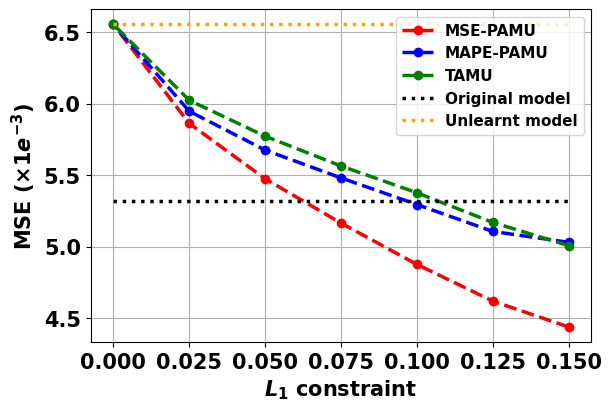

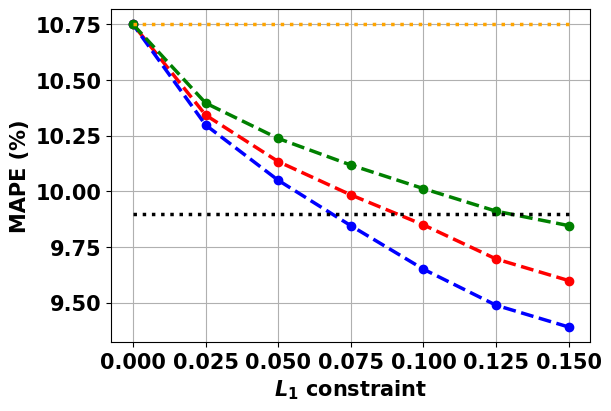

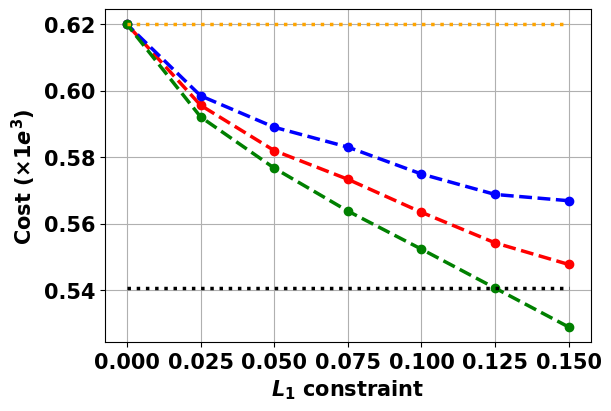

In [6]:
xmin = np.min(unchange_mse["l1_constraints"])
xmax = np.max(unchange_mse["l1_constraints"])

plt.figure()
plt.plot(unchange_mse["l1_constraints"], np.array(unchange_mse["mse_test"]) * 1e3, label = "MSE-PAMU", linestyle = "--", marker = "o", color = "red")
plt.plot(unchange_mape["l1_constraints"], np.array(unchange_mape["mse_test"]) * 1e3, label = "MAPE-PAMU", linestyle = "--", marker = "o", color = "blue")
plt.plot(unchange_cost["l1_constraints"], np.array(unchange_cost["mse_test"]) * 1e3, label = "TAMU", linestyle = "--", marker = "o", color = "green")
plt.hlines(y = unchange_mse["mse_test_ori"] * 1e3, xmin = xmin, xmax = xmax, linestyle = ":", color = "black", label = "Original model")
plt.hlines(y = unchange_mse["mse_test_unlearn"] * 1e3, xmin = xmin, xmax = xmax, linestyle = ":", color = "orange", label = "Unlearnt model")
plt.legend(loc = "best")
plt.xlabel(r"$L_1$ constraint")
plt.ylabel(r"MSE ($\times 1e^{-3}$)")
plt.grid()
plt.savefig(f"figs/{model_type}_unchange_mse.pdf", bbox_inches='tight')
plt.show()

plt.figure()
plt.plot(unchange_mse["l1_constraints"], unchange_mse["mape_test"], label = "MSE", linestyle = "--", marker = "o", color = "red")
plt.plot(unchange_mape["l1_constraints"], unchange_mape["mape_test"], label = "MAPE", linestyle = "--", marker = "o", color = "blue")
plt.plot(unchange_cost["l1_constraints"], unchange_cost["mape_test"], label = "Cost", linestyle = "--", marker = "o", color = "green")
plt.hlines(y = unchange_mape["mape_test_ori"], xmin = xmin, xmax = xmax, linestyle = ":", color = "black", label = "Original")
plt.hlines(y = unchange_mape["mape_test_unlearn"], xmin = xmin, xmax = xmax, linestyle = ":", color = "orange", label = "Unlearn")
# plt.legend(loc = "best")
plt.xlabel(r"$L_1$ constraint")
plt.ylabel("MAPE (%)")
plt.grid()
plt.savefig(f"figs/{model_type}_unchange_mape.pdf", bbox_inches='tight')
plt.show()

plt.figure()
plt.plot(unchange_mse["l1_constraints"], np.array(unchange_mse["cost_test"]) / 1e3, label = "MSE", linestyle = "--", marker = "o", color = "red")
plt.plot(unchange_mape["l1_constraints"], np.array(unchange_mape["cost_test"]) / 1e3, label = "MAPE", linestyle = "--", marker = "o", color = "blue")
plt.plot(unchange_cost["l1_constraints"], np.array(unchange_cost["cost_test"]) / 1e3, label = "Cost", linestyle = "--", marker = "o", color = "green")
plt.hlines(y = unchange_cost["cost_test_ori"] / 1e3, xmin = xmin, xmax = xmax, linestyle = ":", color = "black", label = "Original")
plt.hlines(y = unchange_cost["cost_test_unlearn"] / 1e3, xmin = xmin, xmax = xmax, linestyle = ":", color = "orange", label = "Unlearn")
# plt.legend(loc = "best")
plt.xlabel(r"$L_1$ constraint")
plt.ylabel(r"Cost ($\times 1e^{3}$)")
plt.grid()
plt.savefig(f"figs/{model_type}_unchange_cost.pdf", bbox_inches='tight')
plt.show()

In [7]:
if model_type == 'linear':
    plt.figure()
    plt.plot(unchange_cost['cost_test'], unchange_cost['parameter_diff'], linestyle = "--", marker = "o", color = "red")
    plt.xlabel("Cost")
    plt.ylabel("Parameter difference")
    plt.vlines(x = unchange_cost["cost_test_ori"], ymin = 0, ymax = 0.6, linestyle = ":", colors='black', label = "original model")
    plt.vlines(x = unchange_cost["cost_test_unlearn"], ymin = 0, ymax = 0.6, linestyle = ":", colors='orange', label = "unlearnt model")
    plt.legend(loc = 'best')
    plt.text(x = 970, y = 0.32, s = "trade-off between \ncompleteness and \nperformance", color = "red", fontsize = 16)
    plt.text(x = 810, y = 0.10, s = "continuely \nimprove on \nperformance", color = "red", fontsize = 16)
    plt.grid()
    plt.savefig(f"figs/tradeoff.pdf", bbox_inches='tight')
    plt.show()